# Figure 1

- Panel A: Workflow of image analysis, image-based profiling, and machine learning
- Panel B: Image montage of example single-cells for WT and Null genotype

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(grid))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(RColorBrewer))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Set paths

In [2]:
figure_dir <- "../figures"
output_main_figure_1 <- file.path(figure_dir, "main_figure_1_workflow.png")

## Load in workflow image

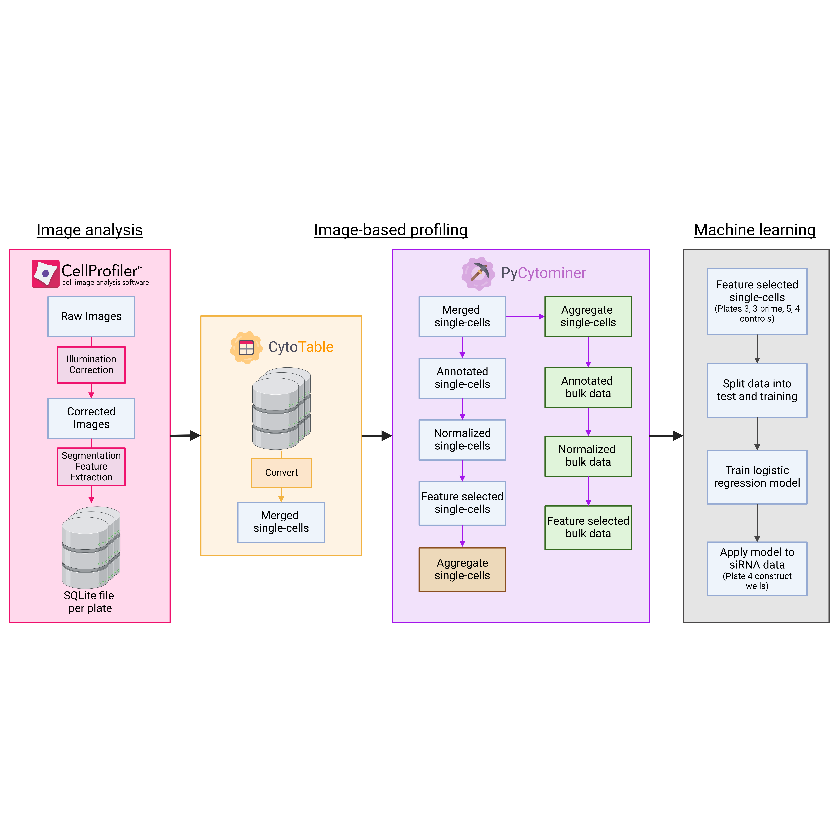

In [3]:
workflow_path = file.path("../figures/workflow.png")
workflow_img = png::readPNG(workflow_path)

# Get the dimensions of the image
img_height <- nrow(workflow_img)
img_width <- ncol(workflow_img)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the workflow image from BioRender to a ggplot object
workflow <- ggplot() +
  annotation_custom(
    rasterGrob(workflow_img, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

workflow

## Load in image montage

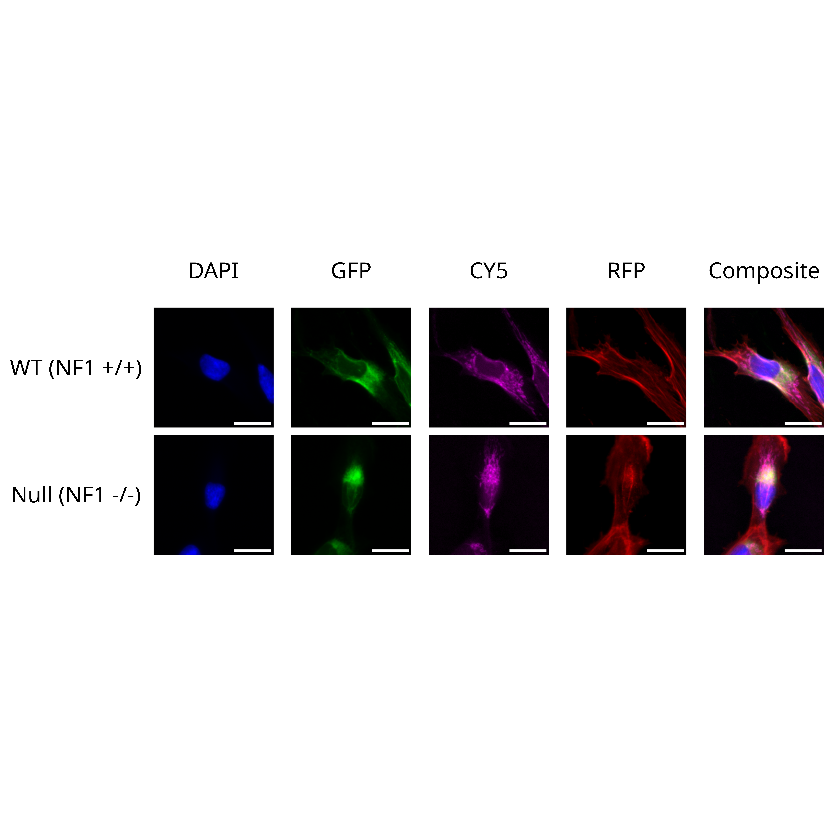

In [4]:
montage_path = file.path("../figures/all_genotypes_montage.png")
montage_img = png::readPNG(montage_path)

# Get the dimensions of the image
img_height <- nrow(montage_img)
img_width <- ncol(montage_img)

# Calculate the aspect ratio
aspect_ratio <- img_height / img_width

# Plot the workflow image from BioRender to a ggplot object
genotype_montage <- ggplot() +
  annotation_custom(
    rasterGrob(montage_img, interpolate = TRUE),
    xmin = -Inf, xmax = Inf, ymin = -Inf, ymax = Inf
  ) +
  theme_void() +
  coord_fixed(ratio = aspect_ratio, clip = "off") +
  theme(plot.margin = margin(0, 0, 0, 0, "cm"))  # Adjust margins as needed

genotype_montage

## Create main figure 1

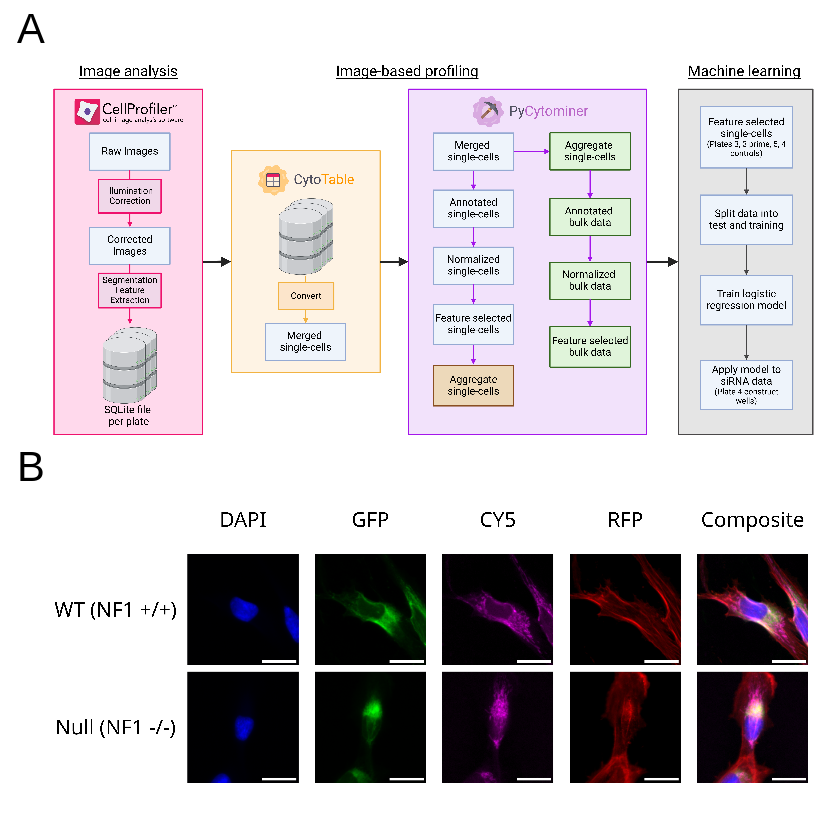

In [5]:
fig_1_gg <- (
  workflow /
  genotype_montage
) + plot_annotation(tag_levels = "A") & theme(plot.tag = element_text(size = 25))

# Save or display the plot
ggsave(output_main_figure_1, plot = fig_1_gg, dpi = 500, height = 14, width = 14)

fig_1_gg